In [9]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [10]:
import os
print(os.listdir('drive/MyDrive'))

['Colab Notebooks', 'DATASET', 'DATASET_224', '43(241).png', '43(247).png', '43(246).png', '43(245).png', '43(248).png', '47(301).png', '47(265).png', '47(270).png', '47(274).png', '47(269).png', '47(293).png', '47(299).png', '47(266).png', '47(272).png', '47(290).png', '47(268).png', '47(294).png', '47(27).png', '47(273).png', '47(271).png', '47(292).png', '47(300).png', '47(298).png', '47(30).png', '47(3).png', '48(114).png', '48(119).png', '48(12).png', '48(118).png', '48(116).png', '48(120).png', '48(112).png', '48(113).png', '48(117).png', '48(115).png', 'DATASET_SOBIT', 'DATASETS', 'data']


In [11]:
DATADIR = "/content/drive/MyDrive/data/NEW_DATASET"
CATEGORIES = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31','32','33','34','35','36','37','38','39','40','41','42','43','44','45','46','47','48','49','50','51','52','53','54','55','56','57','58','59','60','61','62','63']

In [12]:
import cv2

for category in CATEGORIES:
    path = os.path.join(DATADIR, category) 
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        break
    break

In [13]:
print(img_array.shape)

(32, 32)


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import cv2

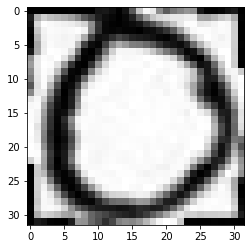

In [15]:
IMG_SIZE = 32
img_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(img_array, cmap = 'gray')
plt.show()

In [16]:
training_data = []
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) 
        class_num= CATEGORIES.index (category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread (os.path.join(path, img), cv2.IMREAD_COLOR)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
create_training_data()  

In [17]:
print(len(training_data))

51200


In [18]:
import random
random.shuffle(training_data)

In [19]:
for sample in training_data[:10]:
    print(sample[1])

33
31
40
60
58
26
41
46
13
2


In [71]:
X = []
y = []

In [72]:
for features, label in training_data:
    X.append(features)
    y.append(label)

In [73]:
X = np.array(X)
y =np.array(y)
X.shape

(51200, 32, 32, 3)

In [74]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

classifier = Sequential()

classifier.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (32, 32, 3)))
classifier.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
classifier.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(.2))

classifier.add(Flatten())

classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dropout(.2))

classifier.add(Dense(units = 64, activation = 'softmax'))

classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [75]:
classifier.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_31 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_32 (Conv2D)          (None, 12, 12, 64)        36928     
                                                                 
 conv2d_33 (Conv2D)          (None, 10, 10, 64)        36928     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                 

In [76]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras

# Assume X and y are loaded from data sources

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split the training set into training and validation sets

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the model architecture

early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss', # Monitor validation loss
    patience=5, # Stop training if validation loss does not improve for 5 epochs
    verbose=1, # Print messages about early stopping
    restore_best_weights=True # Restore weights for best validation loss
)

classifier.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fit the model on the training set with validation data and early stopping
history = classifier.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping] # Add early stopping callback
)






Epoch 1/50
1024/1024 [==============================] - 8s 6ms/step - loss: 3.7270 - accuracy: 0.1127 - val_loss: 2.9786 - val_accuracy: 0.2471
Epoch 2/50
1024/1024 [==============================] - 6s 6ms/step - loss: 2.5662 - accuracy: 0.3362 - val_loss: 1.9333 - val_accuracy: 0.4817
Epoch 3/50
1024/1024 [==============================] - 7s 7ms/step - loss: 1.7682 - accuracy: 0.5252 - val_loss: 1.1714 - val_accuracy: 0.6873
Epoch 4/50
1024/1024 [==============================] - 6s 6ms/step - loss: 1.2438 - accuracy: 0.6555 - val_loss: 0.9162 - val_accuracy: 0.7664
Epoch 5/50
1024/1024 [==============================] - 6s 5ms/step - loss: 0.9524 - accuracy: 0.7303 - val_loss: 0.6801 - val_accuracy: 0.8148
Epoch 6/50
1024/1024 [==============================] - 6s 6ms/step - loss: 0.7806 - accuracy: 0.7748 - val_loss: 0.5566 - val_accuracy: 0.8511
Epoch 7/50
1024/1024 [==============================] - 6s 6ms/step - loss: 0.6660 - accuracy: 0.8044 - val_loss: 0.6750 - val_accuracy:

In [77]:
# Evaluate the model on the testing set
test_loss, test_acc = classifier.evaluate(X_test, y_test)

# print the training and validation losses and accuracies
train_loss = history.history['loss'][-1]
val_loss = history.history['val_loss'][-1]
train_acc = history.history['accuracy'][-1]
val_acc = history.history['val_accuracy'][-1]

print("Training loss:", train_loss)
print("Validation loss:", val_loss)
print("Training accuracy:", train_acc)
print("Validation accuracy:", val_acc)

# print the testing loss and accuracy
print("Testing loss:", test_loss)
print("Testing accuracy:", test_acc)

320/320 [==============================] - 1s 3ms/step - loss: 0.3790 - accuracy: 0.9136
Training loss: 0.2926807105541229
Validation loss: 0.39412471652030945
Training accuracy: 0.912841796875
Validation accuracy: 0.9183349609375
Testing loss: 0.37903907895088196
Testing accuracy: 0.91357421875


In [78]:
from sklearn.metrics import precision_score
import numpy as np
# Compute the predictions for the test data
y_pred = classifier.predict(X_test)

# Convert the predictions into class labels
y_pred = np.argmax(y_pred, axis=1)

# Calculate the precision
precision = precision_score(y_test, y_pred, average='macro')

print("Precision:", precision)


320/320 [==============================] - 1s 2ms/step
Precision: 0.9159435111174825


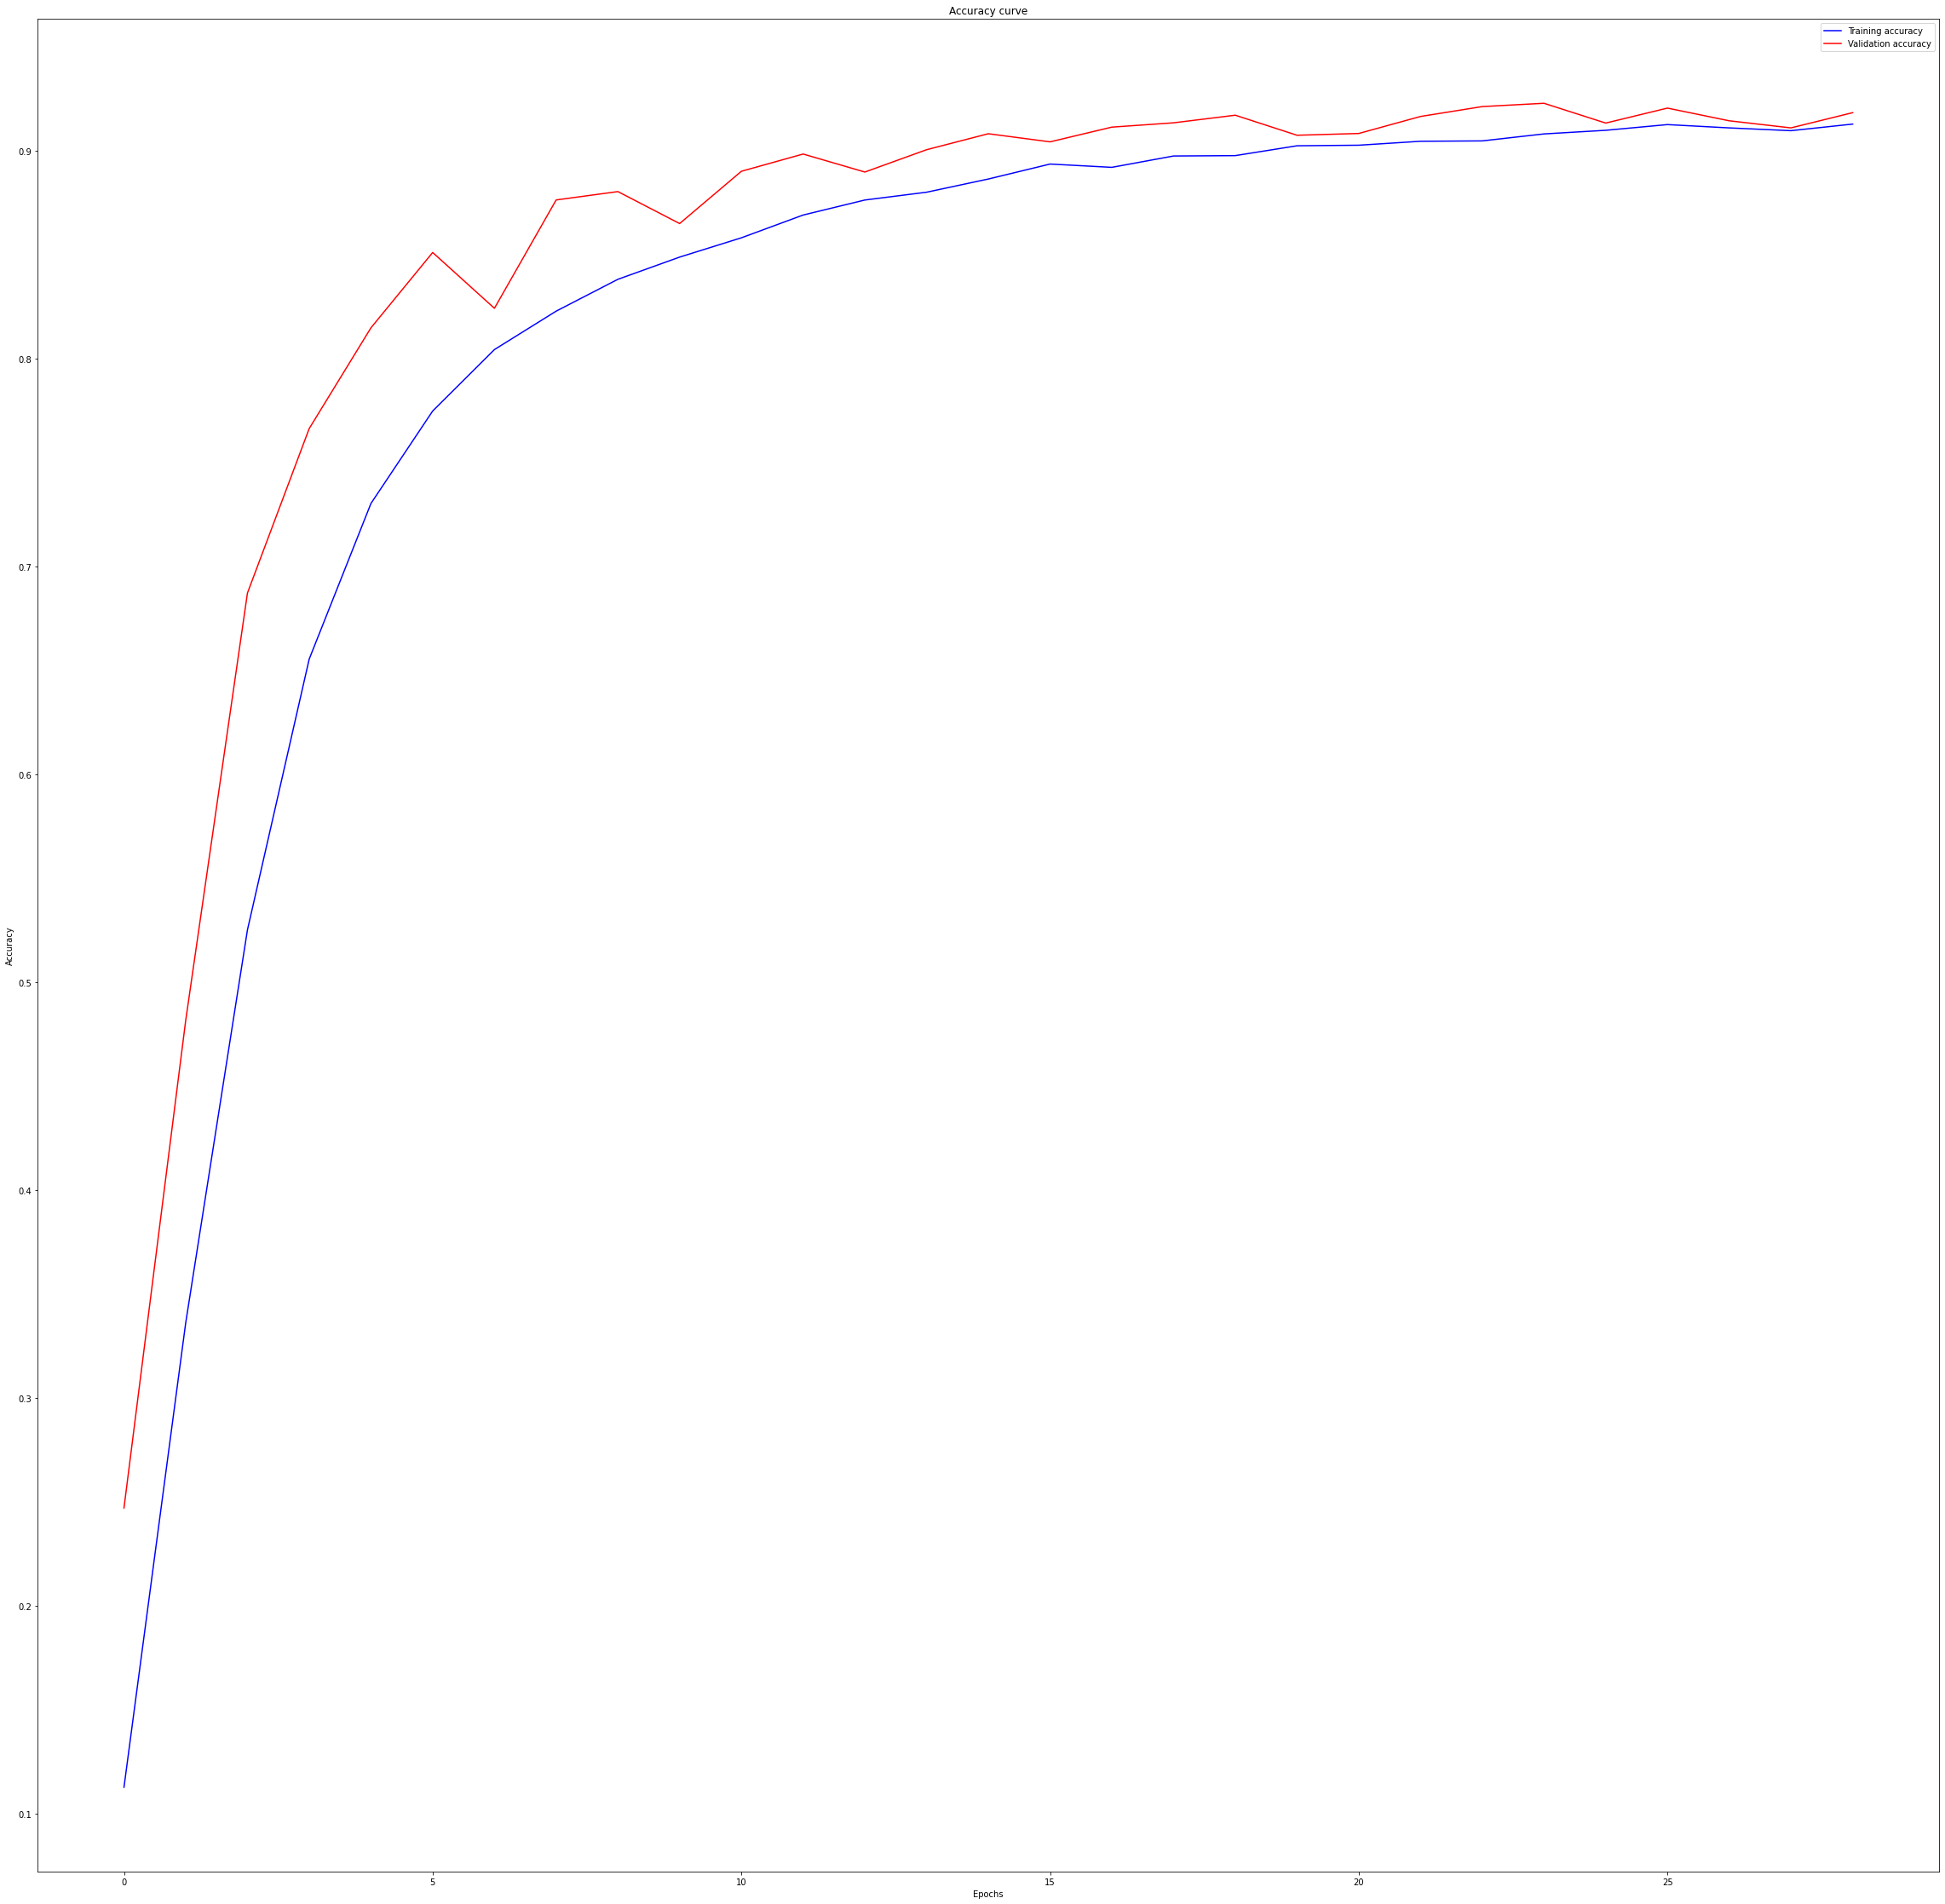

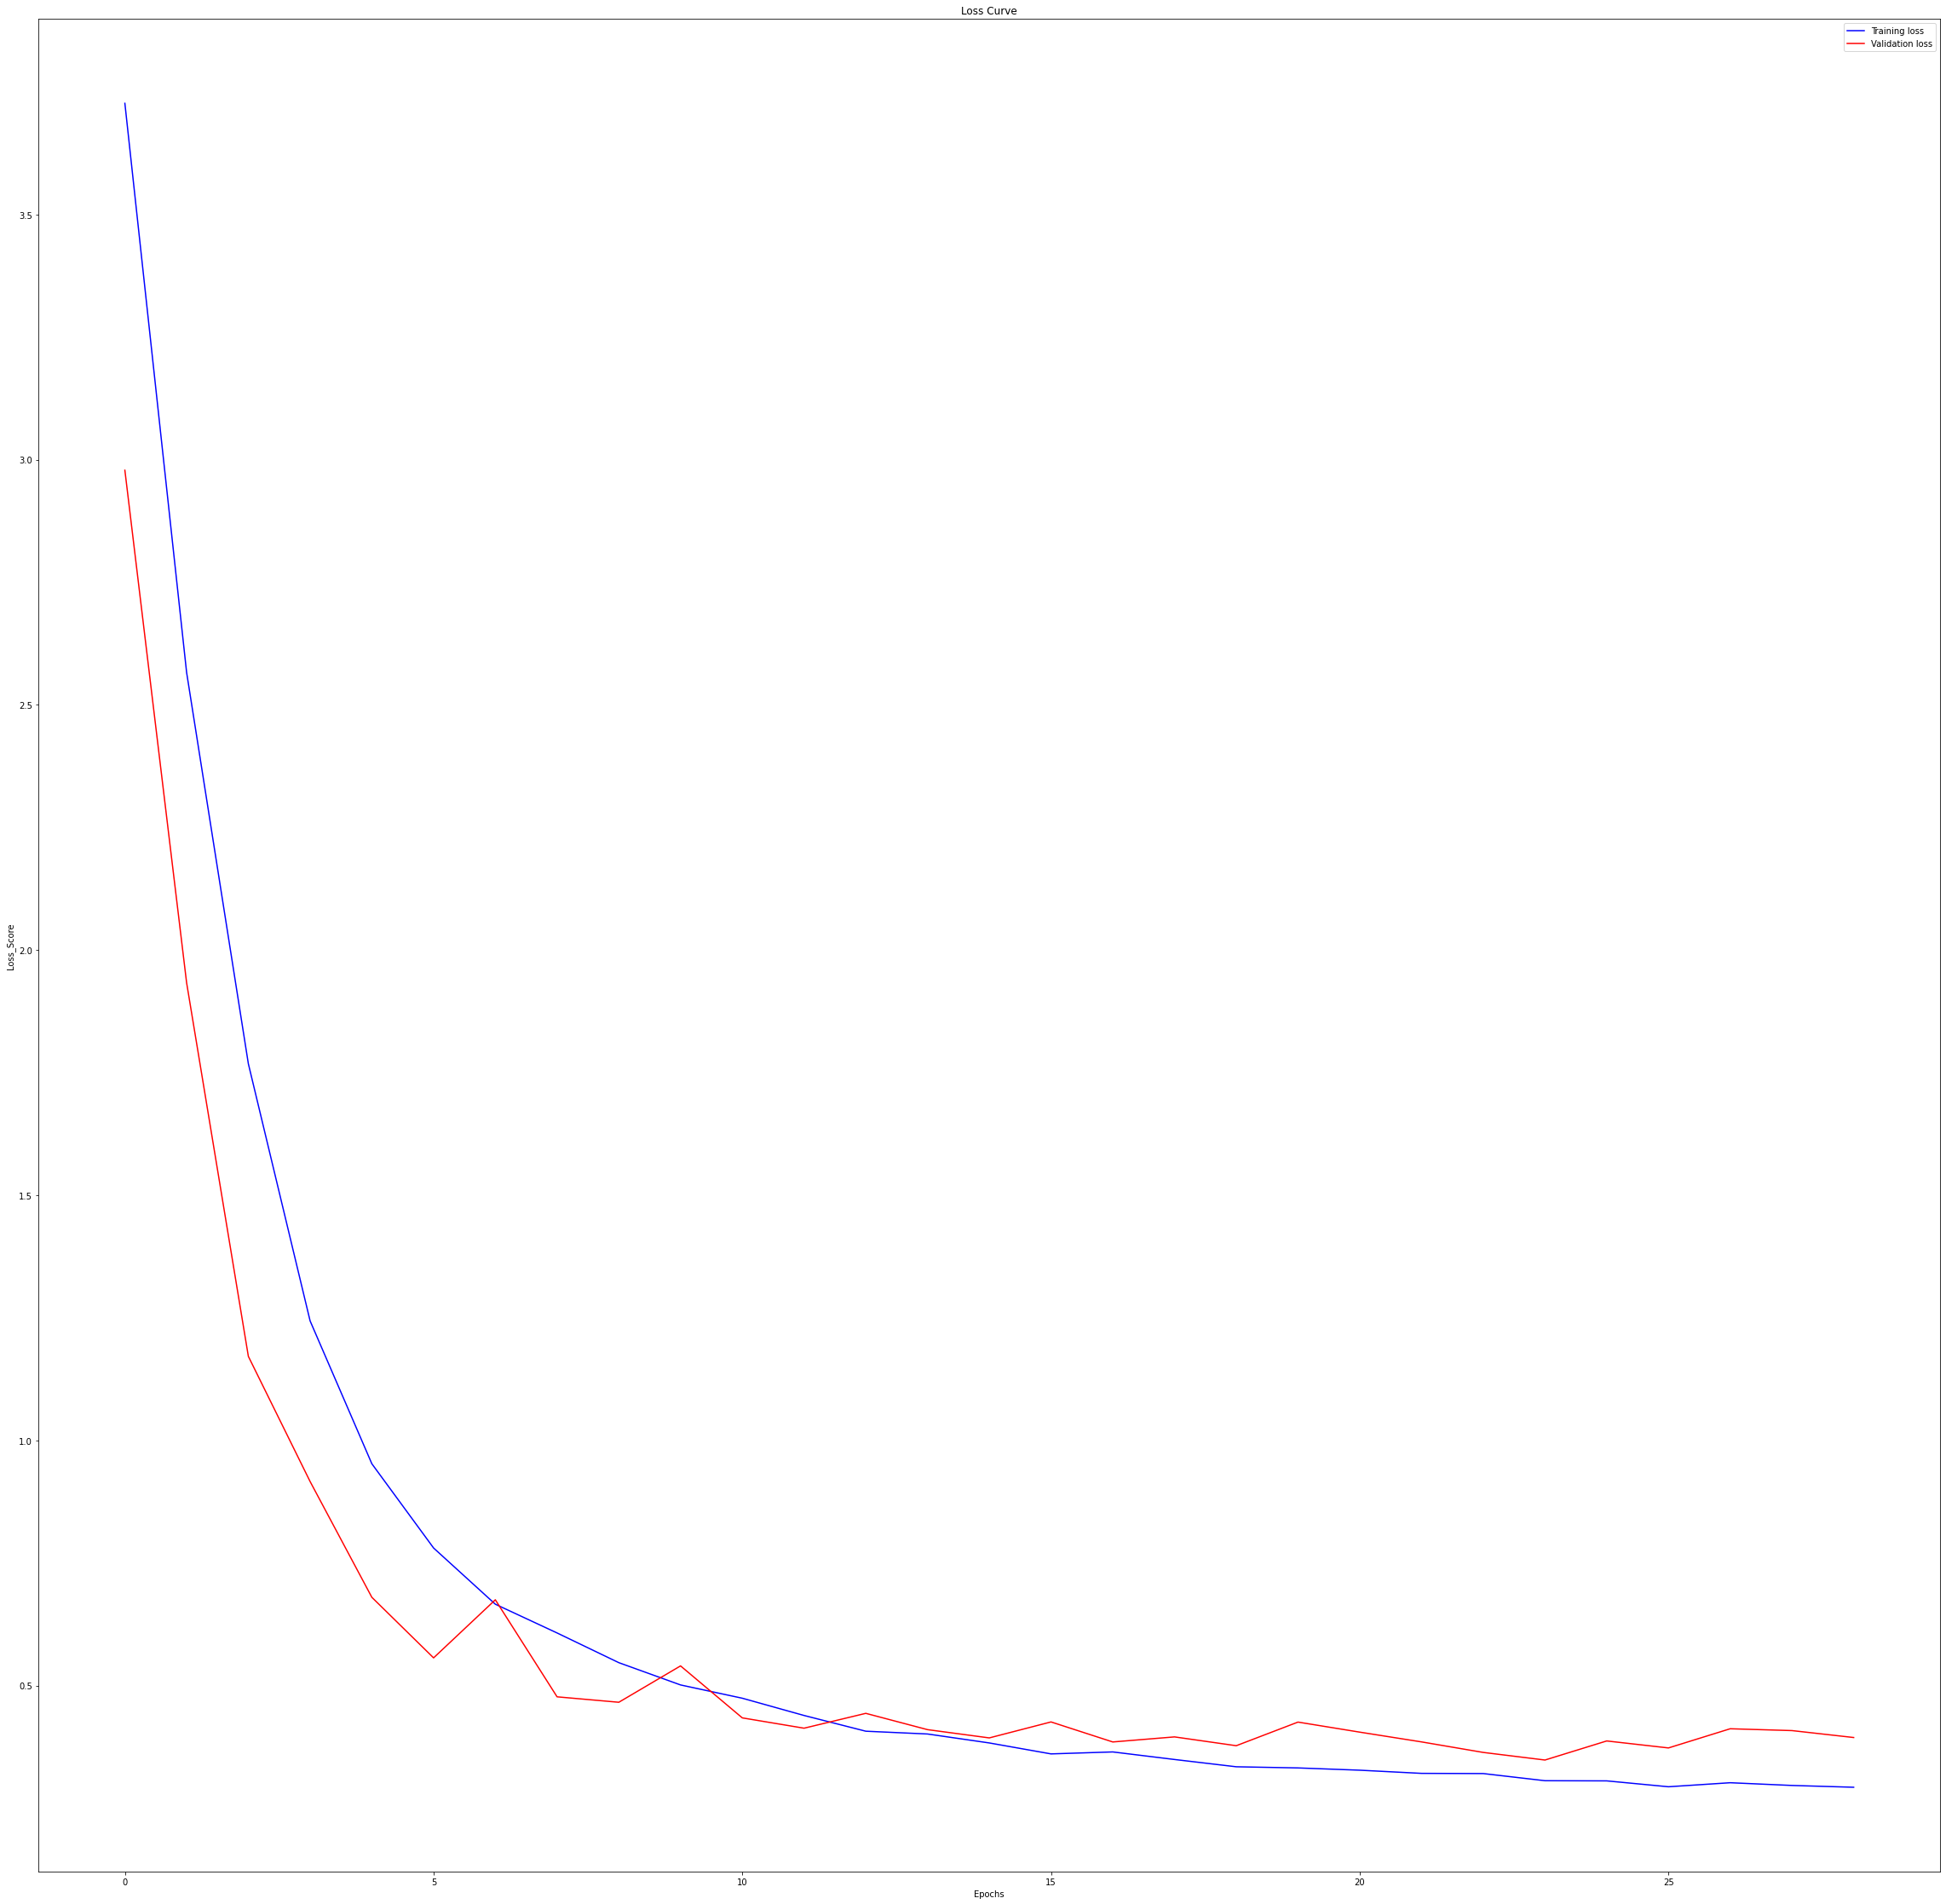

In [79]:
plt.plot(history.history['accuracy'], 'b', label='Training accuracy')
plt.plot(history.history['val_accuracy'], 'r', label='Validation accuracy')
plt.title('Accuracy curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

plt.plot(history.history['loss'], 'b', label='Training loss')
plt.plot(history.history['val_loss'], 'r', label='Validation loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss_Score')
plt.legend(loc='best')
plt.show()

In [80]:
from sklearn.metrics import confusion_matrix
import numpy as np
import tensorflow as tf
y_true = y_test
y_pred = classifier.predict(X_test)
y_pred= tf.argmax(y_pred, axis = 1).numpy()
labels = np.unique(y)
cm = confusion_matrix(y_true, y_pred, labels=labels)
print("Confusion matrix:")
print(cm)
print("\n")
print("Normalized confusion matrix:")
print(cm / np.sum(cm, axis=1, keepdims=True))



320/320 [==============================] - 1s 2ms/step
Confusion matrix:
[[167   0   0 ...   0   0   0]
 [  0 164   1 ...   0   0   0]
 [  0   3 126 ...   0   0   0]
 ...
 [  0   0   0 ... 140   3   0]
 [  0   0   0 ...   0 140   1]
 [  0   0   0 ...   0   0 157]]


Normalized confusion matrix:
[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.92134831 0.00561798 ... 0.         0.         0.        ]
 [0.         0.02040816 0.85714286 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.875      0.01875    0.        ]
 [0.         0.         0.         ... 0.         0.83333333 0.00595238]
 [0.         0.         0.         ... 0.         0.         0.94011976]]


320/320 [==============================] - 1s 2ms/step


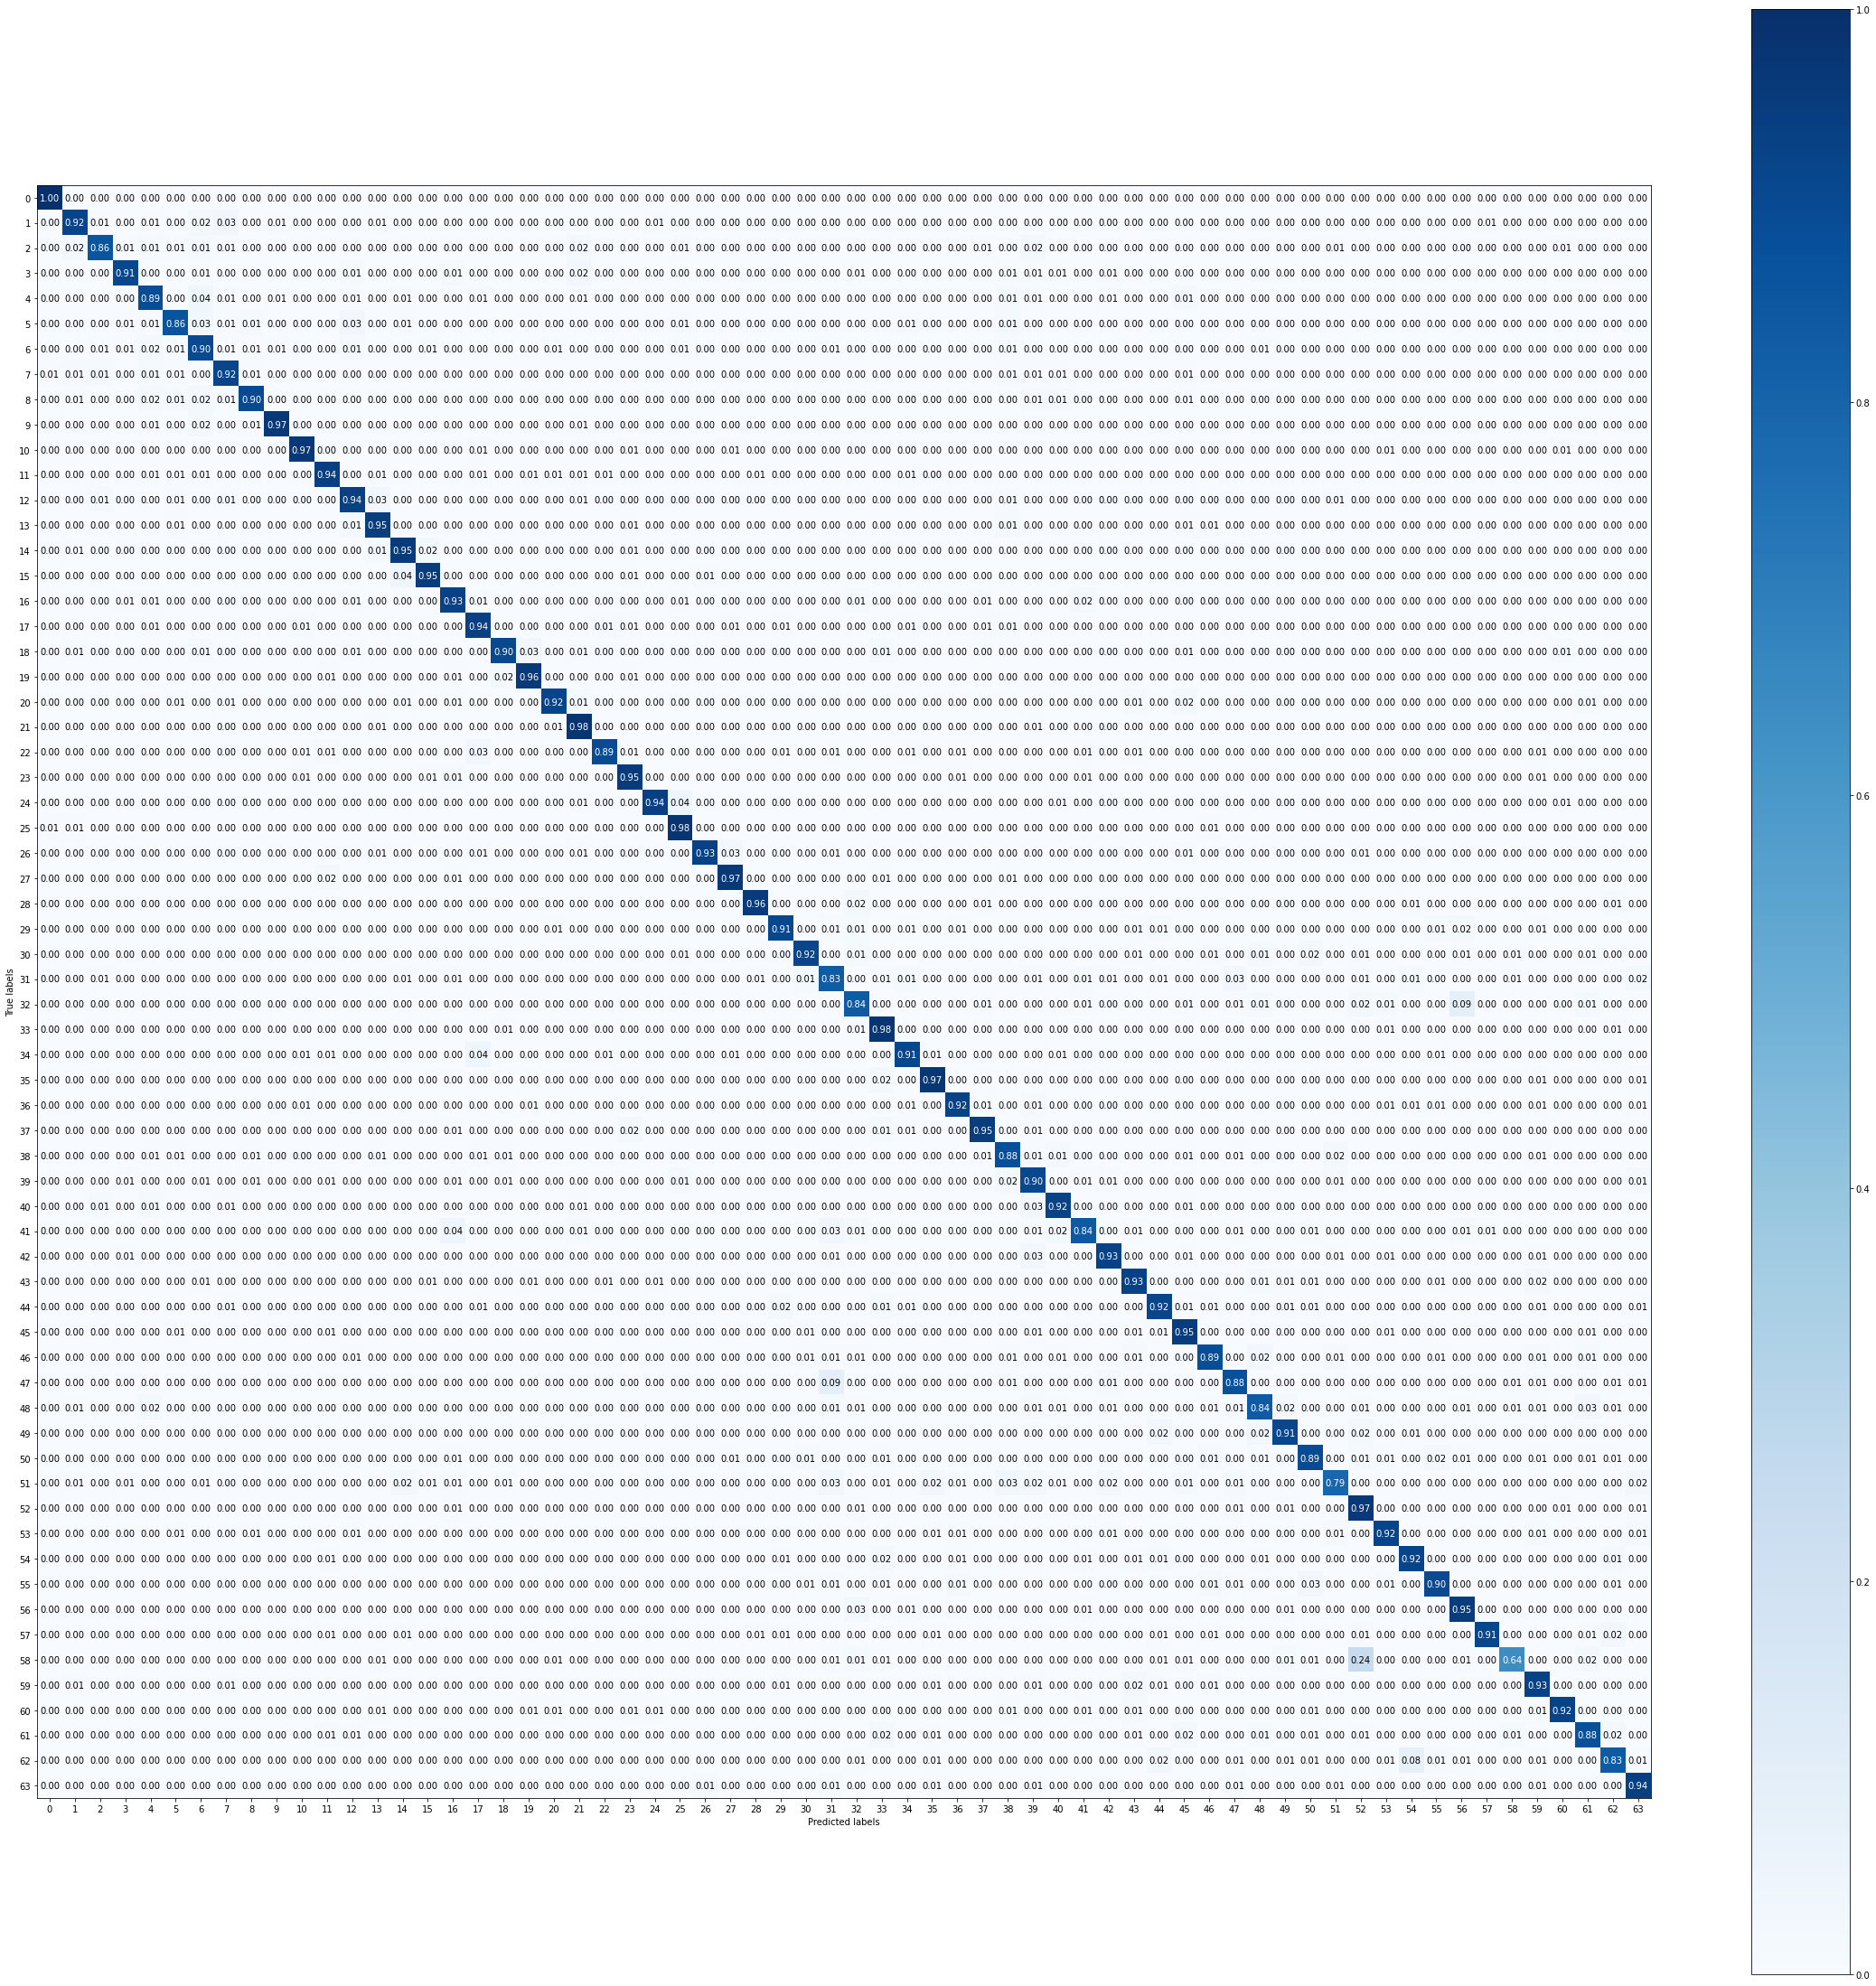

In [81]:
plt.rcParams['figure.figsize'] = (40,40)
y_true = y_test
y_pred = classifier.predict(X_test)
y_pred= tf.argmax(y_pred, axis = 1).numpy()

# The set of possible class labels in the classification problem
labels = np.unique(y)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=labels)
cm = cm.astype('float') / cm.sum(axis=1)

# Plot the confusion matrix as a heatmap
plt.imshow(cm, cmap='Blues')
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks(np.arange(len(labels)), labels)
plt.yticks(np.arange(len(labels)), labels)
plt.colorbar()

# Add annotations to the cells of the confusion matrix
threshold = 0.5
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        color = "white" if cm[i, j] > threshold else "black"
        plt.text(j, i, "{:.2f}".format(cm[i, j]), ha="center", va="center", color=color)

plt.show()


In [65]:
# Print the shape of each set
print('Training set shape:', X_train.shape, y_train.shape)
print('Validation set shape:', X_val.shape, y_val.shape)
print('Testing set shape:', X_test.shape, y_test.shape)

Training set shape: (32768, 32, 32, 3) (32768,)
Validation set shape: (8192, 32, 32, 3) (8192,)
Testing set shape: (10240, 32, 32, 3) (10240,)


In [82]:
from sklearn.metrics import classification_report

# Compute the predictions for the test data
y_pred = classifier.predict(X_test)

# Convert the predictions into class labels
y_pred = np.argmax(y_pred, axis=1)

# Calculate the classification report
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)


320/320 [==============================] - 1s 3ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       167
           1       0.93      0.92      0.93       178
           2       0.93      0.86      0.89       147
           3       0.95      0.91      0.93       150
           4       0.87      0.89      0.88       160
           5       0.91      0.86      0.89       146
           6       0.84      0.90      0.87       166
           7       0.91      0.92      0.91       156
           8       0.94      0.90      0.92       146
           9       0.98      0.97      0.97       179
          10       0.96      0.97      0.97       159
          11       0.93      0.94      0.93       176
          12       0.90      0.94      0.92       170
          13       0.91      0.95      0.93       147
          14       0.91      0.95      0.93       152
          15       0.96      0.95      0.95       166
   

In [83]:
classifier.save('dev.h5')


In [84]:
from keras.models import load_model


model  = load_model('dev.h5')


In [85]:
from google.colab import files

# Download the model file to your local machine
files.download('dev.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [86]:

model.save_weights('/content/weights.h5')

